# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Dela Rohmana Putri]
- **Email:** [delarohmanap@gmail.com]
- **ID Dicoding:** [delarohmana]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa jumlah pengguna sepeda per musim?
- Pertanyaan 2: Bagaimana perbandingan penyewaan sepeda pada workingday dan holiday?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dela_daily = pd.read_csv("/content/drive/MyDrive/dashboard/day.csv")
dela_daily.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
dela_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

In [7]:
dela_daily.dropna(inplace = True)

In [8]:
dela_daily.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
dela_daily.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
dela_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
dela_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan 1: Berapa jumlah pengguna sepeda per musim?

In [22]:
# Menghitung jumlah pengguna sepeda per musim
jumlah_pengguna_per_musim = dela_daily.groupby('season')['cnt'].sum()

print("Jumlah pengguna sepeda per musim:")
print(jumlah_pengguna_per_musim)


Jumlah pengguna sepeda per musim:
season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


Pertanyaan 2: Bagaimana perbandingan penyewaan sepeda pada workingday dan holiday?

In [25]:
penyewaan_per_hari = dela_daily.groupby(['workingday', 'holiday'])['cnt'].sum()

print("Perbandingan penyewaan sepeda pada hari kerja dan hari libur:")
print(penyewaan_per_hari)

Perbandingan penyewaan sepeda pada hari kerja dan hari libur:
workingday  holiday
0           0           921834
            1            78435
1           0          2292410
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berapa jumlah pengguna sepeda per musim?

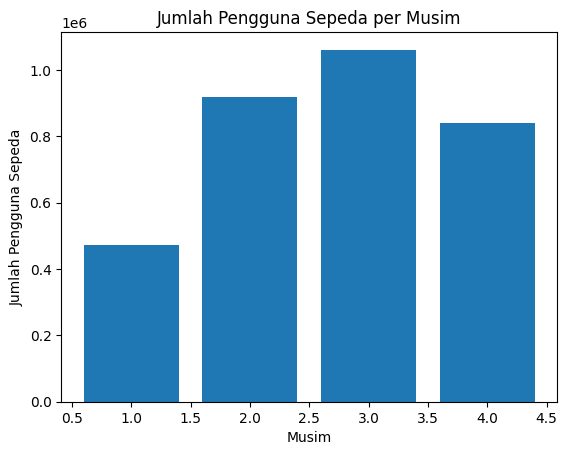

In [26]:
# Menghitung jumlah pengguna sepeda per musim
jumlah_pengguna_per_musim = dela_daily.groupby('season')['cnt'].sum()

# Visualisasi dengan bar plot
plt.bar(jumlah_pengguna_per_musim.index, jumlah_pengguna_per_musim)
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Jumlah Pengguna Sepeda per Musim')
plt.show()

1 = springer

2 = summer

3 = fall

4 = *winter*

### Pertanyaan 2:

Bagaimana perbandingan penyewaan sepeda pada workingday dan holiday?

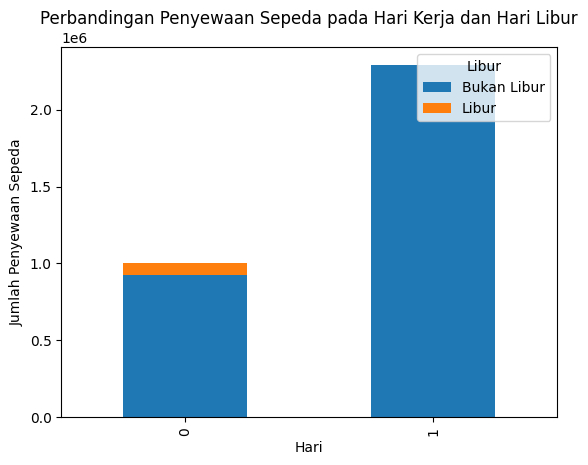

In [32]:
# Menghitung jumlah penyewaan sepeda pada hari kerja dan hari libur
penyewaan_per_hari = dela_daily.groupby(['workingday', 'holiday'])['cnt'].sum()

# Visualisasi dengan bar plot
penyewaan_per_hari.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.legend(title='Libur', labels=['Bukan Libur', 'Libur'], loc='upper right')
plt.show()


0 = workingday

1 = holiday

## Conclusion

- Conclusion pertanyaan 1: Berapa jumlah pengguna sepeda per musim? Berdasarkan hasil visualization data,diketahui bahwa jumlah pengguna sepeda terbanyak adalah musim gugur atau fall season yaitu 1061129 pengguna, musim panas 918589 pengguna, musim dingin 841613 pengguna dan terakhir musim semi 471348 pengguna.

- Conclusion pertanyaan 2: Bagaimana perbandingan penyewaan sepeda pada workingday dan holiday? Berdasarkan hasil visualization data, dapat diketahui bahwa jumlah penyawaan sepeda pada hari libur lebih banyak dari hari kerja.

In [34]:
dela_daily.to_csv("all_data.csv", index=False)